<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Final_Moderna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 1.9 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [4]:
V_Fuente = Quantity([2.5, 3, 3.5], 'V')

def Ajuste(V, A, B):
  return A*(np.exp(V/B) -1)

/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2846: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


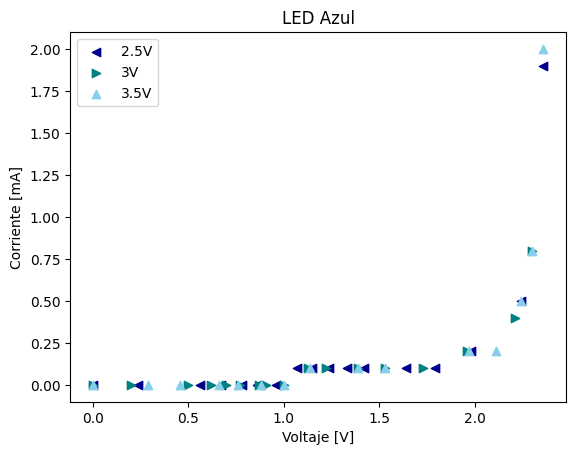

In [5]:
# Azul

V_25_A = Quantity([0, 0.24, 0.56, 0.67, 0.78, 0.86, 0.96, 1.07, 1.15, 1.24, 1.33, 1.42, 1.64, 1.79, 1.98, 2.24, 2.36, 2.47], 'V')
I_25_A = Quantity([0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 1.9, 23.9], 'mA')

V_0_25_A = V_25_A[-2]
I_0_25_A = I_25_A[-2]

V_3_A = Quantity([0, 0.2, 0.5, 0.62, 0.7, 0.77, 0.87, 0.91, 1, 1.13, 1.22, 1.39, 1.53, 1.73, 1.96, 2.21, 2.3, 2.46], 'V')
I_3_A = Quantity([0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.4, 0.8, 19.2], 'mA')

V_0_3_A = V_3_A[-2]
I_0_3_A = I_3_A[-2]

V_35_A = Quantity([0, 0.29, 0.46, 0.66, 0.76, 0.88, 1, 1.14, 1.39, 1.53, 1.97, 2.11, 2.24, 2.3, 2.36, 2.46, 2.5], 'V')
I_35_A = Quantity([0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.2, 0.2, 0.5, 0.8, 2, 21.5, 53.2], 'mA')

V_0_35_A = V_35_A[-3]
I_0_35_A = I_35_A[-3]


plt.scatter(V_25_A[:-1], I_25_A[:-1], label='2.5V', marker = '<', c='darkblue')
plt.scatter(V_3_A[:-1], I_3_A[:-1], label='3V', marker = '>', c='teal')
plt.scatter(V_35_A[:-2], I_35_A[:-2], label='3.5V', marker = '^', c='skyblue')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.title('LED Azul')
plt.legend()
plt.show()

In [6]:
V_0_25_A, I_0_25_A, V_0_3_A, I_0_3_A, V_0_35_A, I_0_35_A

(<Quantity(2.36, 'volt')>,
 <Quantity(1.9, 'milliampere')>,
 <Quantity(2.3, 'volt')>,
 <Quantity(0.8, 'milliampere')>,
 <Quantity(2.36, 'volt')>,
 <Quantity(2.0, 'milliampere')>)

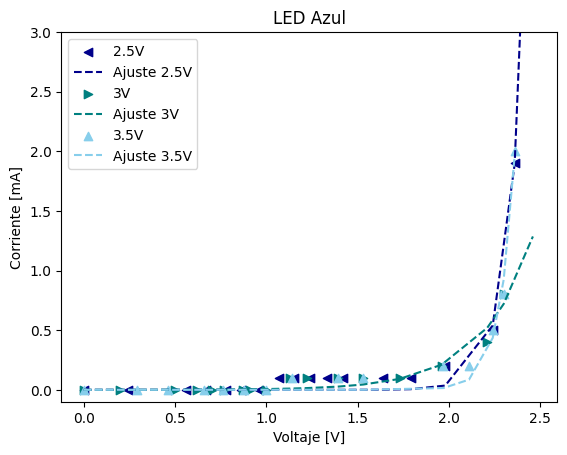

In [7]:

popt_25_A, pcov_A = curve_fit(Ajuste, V_25_A.m[:-1], I_25_A.m[:-1], p0=(10**(-7), 1))
popt_3_A, pcov_A = curve_fit(Ajuste, V_3_A.m[:-1], I_3_A.m[:-1],  p0=(10**(-7), 1))
popt_35_A, pcov_A = curve_fit(Ajuste, V_35_A.m[:-2], I_35_A.m[:-2],  p0=(10**(-7), 1))


plt.scatter(V_25_A.m[:-1], I_25_A.m[:-1], label='2.5V', marker = '<', c='darkblue')
plt.plot(V_25_A.m, Ajuste(V_25_A.m, *popt_25_A), label='Ajuste 2.5V', c='darkblue', linestyle = '--')
plt.scatter(V_3_A.m[:-1], I_3_A.m[:-1], label='3V', marker = '>', c='teal')
plt.plot(V_3_A.m, Ajuste(V_3_A.m, *popt_3_A), label='Ajuste 3V', c='teal', linestyle = '--')
plt.scatter(V_35_A.m[:-2], I_35_A.m[:-2], label='3.5V', marker = '^', c='skyblue')
plt.plot(V_35_A.m[:-2], Ajuste(V_35_A.m, *popt_35_A)[:-2], label='Ajuste 3.5V', c='skyblue', linestyle = '--')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.ylim(-0.1,3)
plt.title('LED Azul')
plt.legend()
plt.show()

In [41]:
popt_25_A, popt_3_A, popt_35_A

err_25_A = np.sqrt(np.diag(pcov_A))
err_3_A = np.sqrt(np.diag(pcov_A))
err_35_A = np.sqrt(np.diag(pcov_A))

kt_25_a = ufloat(popt_25_A[1], err_25_A[1])
kt_3_a = ufloat(popt_3_A[1], err_3_A[1])
kt_35_a = ufloat(popt_35_A[1], err_35_A[1])

kt_25_a*1000, kt_3_a*1000, kt_35_a*1000

(95.68549374333031+/-7.732277189390307,
 276.12167047796186+/-7.732277189390307,
 79.70068955974693+/-7.732277189390307)

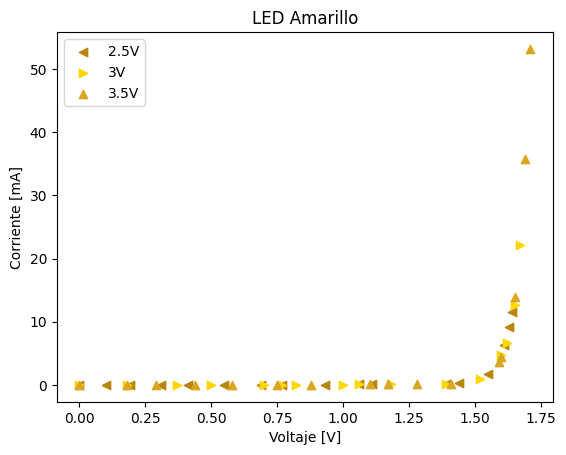

In [9]:
# Amarillo

V_25_Y = Quantity([0, 0.1, 0.19, 0.31, 0.41, 0.55, 0.69, 0.77, 0.93, 1.06, 1.11, 1.39, 1.44, 1.55, 1.61, 1.63, 1.64], 'V')
I_25_Y = Quantity([0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.2, 0.3, 1.7, 6.3, 9.1, 11.5], 'mA')

V_0_25_Y = V_25_Y[-3]
I_0_25_Y = I_25_Y[-3]

V_3_Y = Quantity([0, 0.18, 0.37, 0.5, 0.7, 0.77, 0.82, 1, 1.06, 1.18, 1.39, 1.52, 1.6, 1.62, 1.65, 1.67], 'V')
I_3_Y = Quantity([0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.2, 1, 4.7, 6.6, 12.7, 22.2], 'mA')

V_0_3_Y = V_3_Y[-4]
I_0_3_Y = I_3_Y[-4]

V_35_Y = Quantity([0, 0.18, 0.29, 0.44, 0.58, 0.75, 0.88, 1.1, 1.17, 1.28, 1.41, 1.59, 1.6, 1.65, 1.69, 1.71], 'V')
I_35_Y = Quantity([0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.2, 3.7, 4.5, 13.9, 35.7, 53.2], 'mA')

V_0_35_Y = V_35_Y[-4]
I_0_35_Y = I_35_Y[-4]

plt.scatter(V_25_Y, I_25_Y, label='2.5V', marker = '<', c='darkgoldenrod')
plt.scatter(V_3_Y, I_3_Y, label='3V', marker = '>', c='gold')
plt.scatter(V_35_Y, I_35_Y, label='3.5V', marker = '^', c='goldenrod')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.title('LED Amarillo')
plt.legend()
plt.show()

In [10]:
V_0_25_Y, I_0_25_Y, V_0_3_Y, I_0_3_Y, V_0_35_Y, I_0_35_Y

(<Quantity(1.61, 'volt')>,
 <Quantity(6.3, 'milliampere')>,
 <Quantity(1.6, 'volt')>,
 <Quantity(4.7, 'milliampere')>,
 <Quantity(1.6, 'volt')>,
 <Quantity(4.5, 'milliampere')>)

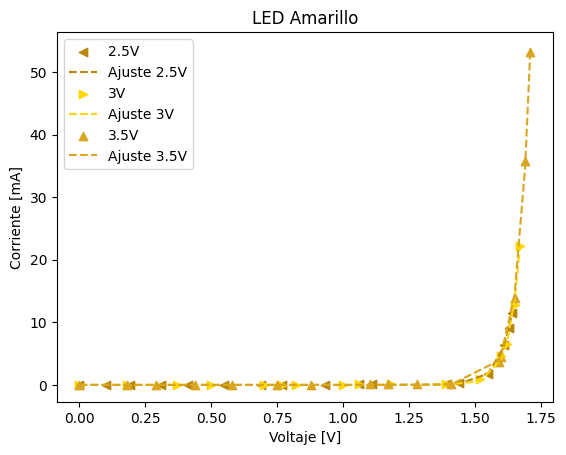

In [11]:
popt_25_Y, pcov_25_Y = curve_fit(Ajuste, V_25_Y.m, I_25_Y.m, p0=(10**(-7), 1))
popt_3_Y, pcov_3_Y = curve_fit(Ajuste, V_3_Y.m, I_3_Y.m, p0=(10**(-7), 1))
popt_35_Y, pcov_35_Y = curve_fit(Ajuste, V_35_Y.m, I_35_Y.m, p0=(10**(-7), 1))

plt.scatter(V_25_Y.m, I_25_Y.m, label='2.5V', marker = '<', c='darkgoldenrod')
plt.plot(V_25_Y.m, Ajuste(V_25_Y.m, *popt_25_Y), label='Ajuste 2.5V', c='darkgoldenrod', linestyle = '--')
plt.scatter(V_3_Y.m, I_3_Y.m, label='3V', marker = '>', c='gold')
plt.plot(V_3_Y.m, Ajuste(V_3_Y.m, *popt_3_Y), label='Ajuste 3V', c='gold', linestyle = '--')
plt.scatter(V_35_Y.m, I_35_Y.m, label='3.5V', marker = '^', c='goldenrod')
plt.plot(V_35_Y.m, Ajuste(V_35_Y.m, *popt_35_Y), label='Ajuste 3.5V', c='goldenrod', linestyle = '--')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.title('LED Amarillo')
plt.legend()
plt.show()

In [39]:
popt_25_Y, popt_3_Y, popt_35_Y

err_25_Y = np.sqrt(np.diag(pcov_25_Y))
err_3_Y = np.sqrt(np.diag(pcov_3_Y))
err_35_Y = np.sqrt(np.diag(pcov_35_Y))

kt_25_y = ufloat(popt_25_Y[1], err_25_Y[1])
kt_3_y = ufloat(popt_3_Y[1], err_3_Y[1])
kt_35_y = ufloat(popt_35_Y[1], err_35_Y[1])

kt_25_y*1000, kt_3_y*1000, kt_35_y*1000

(48.64033258831959+/-0.9601312130135308,
 41.7199582167046+/-1.224995076358773,
 45.685717665158855+/-0.6472593558387255)

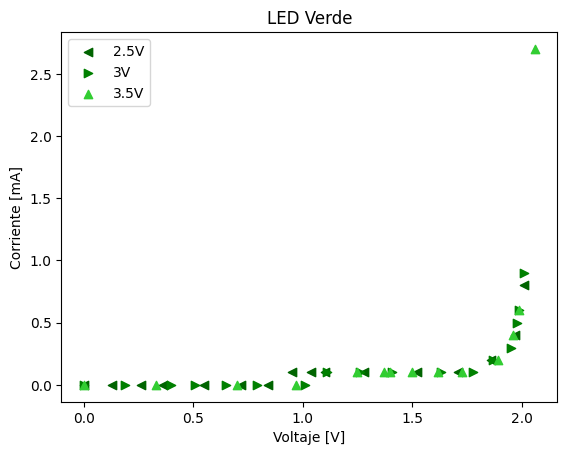

In [13]:
# Verde

V_25_G = Quantity([0, 0.13, 0.26, 0.36, 0.55, 0.72, 0.84, 0.95, 1.04, 1.1, 1.28, 1.52, 1.71, 1.86, 1.97, 2.01], 'V')
I_25_G = Quantity([0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.4, 0.8], 'mA')

V_0_25_G = V_25_G[-2]
I_0_25_G = I_25_G[-2]

V_3_G = Quantity([0, 0.19, 0.4, 0.51, 0.65, 0.79, 1.01, 1.11, 1.26, 1.41, 1.63, 1.78, 1.87, 1.95, 1.98, 1.99, 2.01], 'V')
I_3_G = Quantity([0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.5, 0.6, 0.9], 'mA')

V_0_3_G = V_3_G[-2]
I_0_3_G = I_3_G[-2]

V_35_G = Quantity([0, 0.33, 0.7, 0.97, 1.25, 1.37, 1.4, 1.5, 1.62, 1.73, 1.89, 1.96, 1.99, 2.06, 2.1, 2.18], 'V')
I_35_G = Quantity([0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.4, 0.6, 2.7, 6.9, 51.2], 'mA')

V_0_35_G = V_35_G[-4]
I_0_35_G = I_35_G[-4]

plt.scatter(V_25_G, I_25_G, label='2.5V', marker = '<', c='darkgreen')
plt.scatter(V_3_G, I_3_G, label='3V', marker = '>', c='green')
plt.scatter(V_35_G[:-2], I_35_G[:-2], label='3.5V', marker = '^', c='limegreen')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.title('LED Verde')
plt.legend()
plt.show()

In [14]:
V_0_25_G, I_0_25_G, V_0_3_G, I_0_3_G, V_0_35_G, I_0_35_G

(<Quantity(1.97, 'volt')>,
 <Quantity(0.4, 'milliampere')>,
 <Quantity(1.99, 'volt')>,
 <Quantity(0.6, 'milliampere')>,
 <Quantity(1.99, 'volt')>,
 <Quantity(0.6, 'milliampere')>)

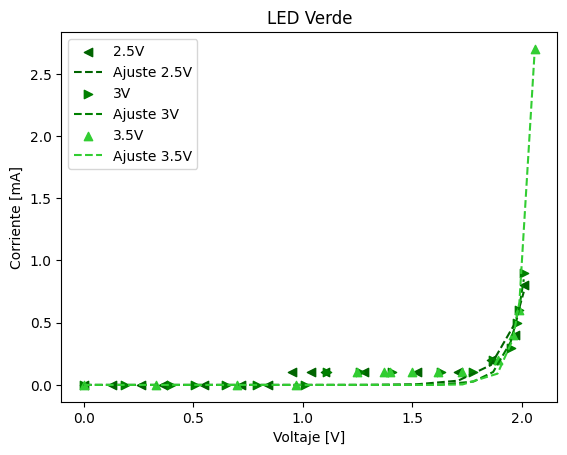

In [15]:
popt_25_G, pcov_25_G = curve_fit(Ajuste, V_25_G.m, I_25_G.m, p0=(10**(-7), 1))
popt_3_G, pcov_3_G = curve_fit(Ajuste, V_3_G.m, I_3_G.m, p0=(10**(-7), 1))
popt_35_G, pcov_35_G = curve_fit(Ajuste, V_35_G.m[:-2], I_35_G.m[:-2], p0=(10**(-9), 1))

plt.scatter(V_25_G.m, I_25_G.m, label='2.5V', marker = '<', c='darkgreen')
plt.plot(V_25_G.m, Ajuste(V_25_G.m, *popt_25_G), label='Ajuste 2.5V', c='darkgreen', linestyle = '--')
plt.scatter(V_3_G.m, I_3_G.m, label='3V', marker = '>', c='green')
plt.plot(V_3_G.m, Ajuste(V_3_G.m, *popt_3_G), label='Ajuste 3V', c='green', linestyle = '--')
plt.scatter(V_35_G.m[:-2], I_35_G.m[:-2], label='3.5V', marker = '^', c='limegreen')
plt.plot(V_35_G.m[:-2], Ajuste(V_35_G.m, *popt_35_G)[:-2], label='Ajuste 3.5V', c='limegreen', linestyle = '--')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.title('LED Verde')
plt.legend()
plt.show()

In [40]:
popt_25_G, popt_3_G, popt_35_G

err_25_G = np.sqrt(np.diag(pcov_25_G))
err_3_G = np.sqrt(np.diag(pcov_3_G))
err_35_G = np.sqrt(np.diag(pcov_35_G))

kt_25_g = ufloat(popt_25_G[1], err_25_G[1])
kt_3_g = ufloat(popt_3_G[1], err_3_G[1])
kt_35_g = ufloat(popt_35_G[1], err_35_G[1])

kt_25_g*1000, kt_3_g*1000, kt_35_g*1000

(97.1139815727371+/-22.443292766997615,
 66.6900389460993+/-10.90127330764376,
 50.107606185050535+/-3.4025547196348778)

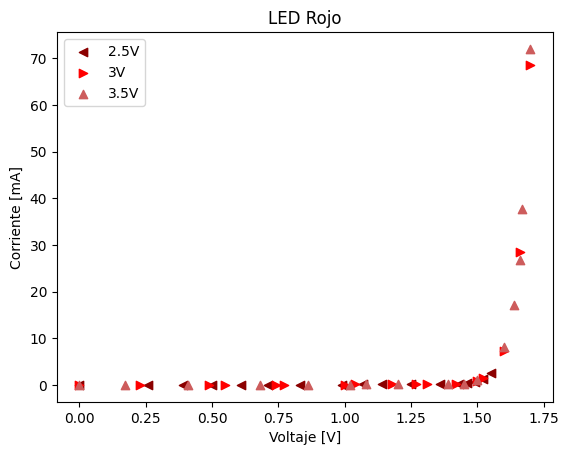

In [17]:
# Rojo

V_25_R = Quantity([0, 0.26, 0.39, 0.5, 0.61, 0.71, 0.83, 0.99, 1.07, 1.14, 1.25, 1.36, 1.43, 1.46, 1.49, 1.52, 1.55], 'V')
I_25_R = Quantity([0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.2, 0.4, 0.7, 1.3, 2.5], 'mA')

V_0_25_R = V_25_R[-3]
I_0_25_R = I_25_R[-3]

V_3_R = Quantity([0, 0.23, 0.49, 0.55, 0.74, 0.77, 1, 1.04, 1.18, 1.27, 1.31, 1.42, 1.5, 1.52, 1.6, 1.66, 1.7], 'V')
I_3_R = Quantity([0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.2, 0.8, 1.4, 7.3, 28.4, 68.6], 'mA')

V_0_3_R = V_3_R[-5]
I_0_3_R = I_3_R[-5]

V_35_R = Quantity([0, 0.17, 0.41, 0.68, 0.86, 1.02, 1.08, 1.2, 1.39, 1.45, 1.5, 1.6, 1.64, 1.66, 1.67, 1.7], 'V')
I_35_R = Quantity([0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.3, 1, 8.1, 17.2, 26.8, 37.7, 72], 'mA')

V_0_35_R = V_35_R[-6]
I_0_35_R = I_35_R[-6]

plt.scatter(V_25_R, I_25_R, label='2.5V', marker = '<', c='darkred')
plt.scatter(V_3_R, I_3_R, label='3V', marker = '>', c='red')
plt.scatter(V_35_R, I_35_R, label='3.5V', marker = '^', c='indianred')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.title('LED Rojo')
plt.legend()
plt.show()

In [18]:
V_0_25_R, I_0_25_R, V_0_3_R, I_0_3_R, V_0_35_R, I_0_35_R

(<Quantity(1.49, 'volt')>,
 <Quantity(0.7, 'milliampere')>,
 <Quantity(1.5, 'volt')>,
 <Quantity(0.8, 'milliampere')>,
 <Quantity(1.5, 'volt')>,
 <Quantity(1.0, 'milliampere')>)

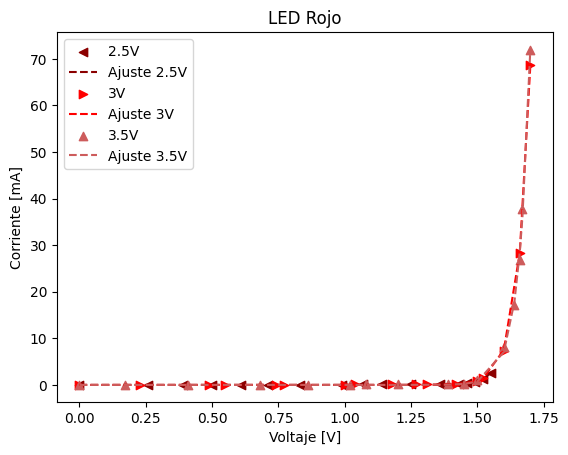

In [32]:
popt_25_R, pcov_25_R = curve_fit(Ajuste, V_25_R.m, I_25_R.m)
popt_3_R, pcov_3_R = curve_fit(Ajuste, V_3_R.m, I_3_R.m)
popt_35_R, pcov_35_R = curve_fit(Ajuste, V_35_R.m, I_35_R.m)

plt.scatter(V_25_R.m, I_25_R.m, label='2.5V', marker = '<', c='darkred')
plt.plot(V_25_R.m, Ajuste(V_25_R.m, *popt_25_R), label='Ajuste 2.5V', c='darkred', linestyle = '--')
plt.scatter(V_3_R.m, I_3_R.m, label='3V', marker = '>', c='red')
plt.plot(V_3_R.m, Ajuste(V_3_R.m, *popt_3_R), label='Ajuste 3V', c='red', linestyle = '--')
plt.scatter(V_35_R.m, I_35_R.m, label='3.5V', marker = '^', c='indianred')
plt.plot(V_35_R.m, Ajuste(V_35_R.m, *popt_35_R), label='Ajuste 3.5V', c='indianred', linestyle = '--')

plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.title('LED Rojo')
plt.legend()
plt.show()

In [38]:
popt_25_R, popt_3_R, popt_35_R

err_25_R = np.sqrt(np.diag(pcov_25_R))
err_3_R = np.sqrt(np.diag(pcov_3_R))
err_35_R = np.sqrt(np.diag(pcov_35_R))

kt_25_r = ufloat(popt_25_R[1], err_25_R[1])
kt_3_r = ufloat(popt_3_R[1], err_3_R[1])
kt_35_r = ufloat(popt_35_R[1], err_35_R[1])

kt_25_r*1000, kt_3_r*1000, kt_35_r*1000

(47.704505353341474+/-1.6906686705839915,
 45.15412930884143+/-0.13215517434235471,
 43.04994582761673+/-0.7982087770638512)

In [21]:
# Conastante de Plank

L_A = Quantity(469, 'nm')
L_Y = Quantity(590, 'nm')
L_G = Quantity(567, 'nm')
L_R = Quantity(659, 'nm')

c = Quantity(299792485, 'm/s')

F_A = c/L_A
F_A = F_A.to('Hz')
F_Y = c/L_Y
F_Y = F_Y.to('Hz')
F_G = c/L_G
F_G = F_G.to('Hz')
F_R = c/L_R
F_R = F_R.to('Hz')

Q = Quantity(1.602176634*10**(-19), 'C')

E_A_25 = Q*V_0_25_A
E_A_25 = E_A_25.to('J')
E_A_3 = Q*V_0_3_A
E_A_3 = E_A_3.to('J')
E_A_35 = Q*V_0_35_A
E_A_35 = E_A_35.to('J')

E_Y_25 = Q*V_0_25_Y
E_Y_25 = E_Y_25.to('J')
E_Y_3 = Q*V_0_3_Y
E_Y_3 = E_Y_3.to('J')
E_Y_35 = Q*V_0_35_Y
E_Y_35 = E_Y_35.to('J')

E_G_25 = Q*V_0_25_G
E_G_25 = E_G_25.to('J')
E_G_3 = Q*V_0_3_G
E_G_3 = E_G_3.to('J')
E_G_35 = Q*V_0_35_G
E_G_35 = E_G_35.to('J')

E_R_25 = Q*V_0_25_R
E_R_25 = E_R_25.to('J')
E_R_3 = Q*V_0_3_R
E_R_3 = E_R_3.to('J')
E_R_35 = Q*V_0_35_R
E_R_35 = E_R_35.to('J')

Q, c, E_A_25

(<Quantity(1.6021766340000001e-19, 'coulomb')>,
 <Quantity(299792485, 'meter / second')>,
 <Quantity(3.7811368562400003e-19, 'joule')>)

In [22]:
E_25 = Quantity([E_R_25.m, E_Y_25.m, E_G_25.m, E_A_25.m], 'J')
E_3 = Quantity([E_R_3.m, E_Y_3.m, E_G_3.m, E_A_3.m], 'J')
E_35 = Quantity([E_R_35.m, E_Y_35.m, E_G_35.m, E_A_35.m], 'J')
F = Quantity([F_R.m, F_Y.m, F_G.m, F_A.m], 'Hz')

In [23]:
E_25, E_3, E_35

(<Quantity([2.38724318e-19 2.57950438e-19 3.15628797e-19 3.78113686e-19], 'joule')>,
 <Quantity([2.40326495e-19 2.56348261e-19 3.18833150e-19 3.68500626e-19], 'joule')>,
 <Quantity([2.40326495e-19 2.56348261e-19 3.18833150e-19 3.78113686e-19], 'joule')>)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:647: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = asarray(a, dtype=dtype, order=order)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


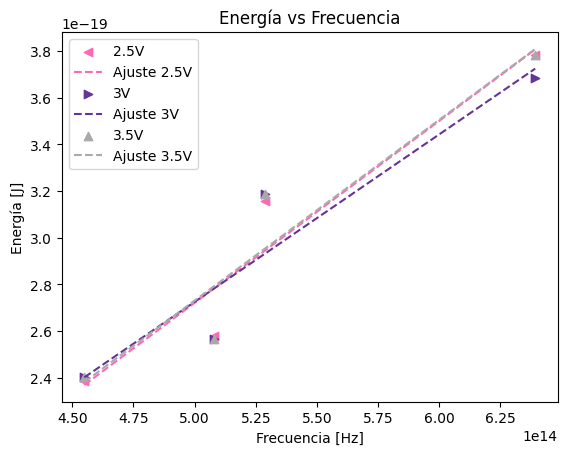

In [24]:
def lineal(x, m, b):
  return x.m*m + b

popt_25, pcov_25 = curve_fit(lineal, F, E_25)
popt_3, pcov_3 = curve_fit(lineal, F, E_3)
popt_35, pcov_35 = curve_fit(lineal, F, E_35)

plt.scatter(F, E_25, label='2.5V', marker = '<', c='hotpink')
plt.plot(F, lineal(F, *popt_25), label='Ajuste 2.5V', c='hotpink', linestyle = '--')
plt.scatter(F, E_3, label='3V', marker = '>', c='rebeccapurple')
plt.plot(F, lineal(F, *popt_3), label='Ajuste 3V', c='rebeccapurple', linestyle = '--')
plt.scatter(F, E_35, label='3.5V', marker = '^', c='darkgrey')
plt.plot(F, lineal(F, *popt_35), label='Ajuste 3.5V', c='darkgrey', linestyle = '--')

plt.xlabel('Frecuencia [Hz]') # It's frequency, not voltage
plt.ylabel('Energía [J]') # It's energy, not current
plt.title('Energía vs Frecuencia') # Add appropriate title
plt.legend()
plt.show()

In [25]:
popt_25, popt_3, popt_35

err_25 = np.sqrt(np.diag(pcov_25))
err_3 = np.sqrt(np.diag(pcov_3))
err_35 = np.sqrt(np.diag(pcov_35))

err_25, err_3, err_35

h_25 = ufloat(popt_25[0], err_25[0]) * ureg.J*ureg.s
h_3 = ufloat(popt_3[0], err_3[0]) * ureg.J*ureg.s
h_35 = ufloat(popt_35[0], err_35[0]) * ureg.J*ureg.s

h_25, h_3, h_35

(<Quantity((7.80361+/-1.55867)e-34, 'joule * second')>,
 <Quantity((7.18103+/-1.79396)e-34, 'joule * second')>,
 <Quantity((7.74916+/-1.74303)e-34, 'joule * second')>)

In [46]:
mean = np.mean([h_25, h_3, h_35])
mean.n, mean.s

(7.577933050310623e-34, 9.82397079486984e-35)